In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam, Adamax
from keras.utils import to_categorical
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split

In [ ]:
path = "/content/drive/MyDrive/occupancy/position_1/"



df = pd.read_csv(path+'sc6-61_2024-02-07_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-08_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-09_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-14_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-15_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-21_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-28_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-02-29_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-06_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-07_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-13_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-14_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-20_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-21_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-22_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-23_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-24_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-27_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-28_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-29_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-30_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-03-31_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-04-01_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-04-03_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])
df = pd.concat([df,pd.read_csv(path+'sc6-61_2024-04-04_ver-99.csv', sep = ";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'])])



#Too little RAM for this (works though, if more than 12.7 Gb)
#csv_files = glob.glob(path + "*"+"*.csv")
#csv_files = sorted(csv_files)
#df = pd.concat((pd.read_csv(filename, sep=";", usecols=['datetime', 'src', 'randomized', 'rssi', 'ssid', 'occupancy'], decimal=".") for filename in csv_files), ignore_index=True)
#del(csv_files)


#We change the datetime from string to timestamp
df['datetime'] = pd.to_datetime(df['datetime'])

#Any probe made by weaker signal is not in the room, and needs to be removed
df = df.query("rssi > -70")
#We also add a column, "interval", allwowing us to work with sets of data in X minutes period
#10 is practical, allowing each hour to be divided in six bundles.
interval_minutes = 7
df['interval'] = df['datetime'].dt.round(f'{interval_minutes}min')

df = df[df['occupancy'].notna()]



#We also create an array of minutes sets to easily parse our dataframe.
minutesSetsdf = df['interval'].unique()
for element in range(len(minutesSetsdf)):
    element=str(element)

listNumberDevices=[]
for loop in range(len(minutesSetsdf)):
    listNumberDevices.append([])
    listNumberDevices[loop].append(0)

# ---------------------------------------------------------------

irelevant_df1 = pd.read_csv('/content/drive/MyDrive/occupancy/position_1/sc6-61_2024-03-15_ver-99.csv', sep = ";", usecols=['src'])
pd.concat([irelevant_df1,pd.read_csv('/content/drive/MyDrive/occupancy/position_1/sc6-61_2024-03-16_ver-99.csv', sep = ";", usecols=['src'])])
pd.concat([irelevant_df1,pd.read_csv('/content/drive/MyDrive/occupancy/position_1/sc6-61_2024-03-17_ver-99.csv', sep = ";", usecols=['src'])])


dictionary = {'src': ["dc:fb:48:68:be:e4", "dc:fb:48:8c:71:fc", "dc:fb:48:2a:52:e0", "dc:fb:48:f5:c6:c2",
    "dc:fb:48:e3:ab:78", "dc:fb:48:00:51:90", "dc:fb:48:75:d8:42", "dc:fb:48:de:86:8d", "dc:fb:48:dd:c6:0b",
    "dc:fb:48:55:d5:78", "dc:fb:48:c2:1d:64", "40:ec:99:f9:34:a6", "40:ec:99:8e:3f:63", "40:ec:99:1f:3e:75"]}
desktopWifiMacsList = pd.DataFrame(dictionary, columns=['src'], index=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11','12','13'])



irelevant_df1 = pd.DataFrame(pd.concat([irelevant_df1, desktopWifiMacsList]))
irelevant_df1 = pd.DataFrame(irelevant_df1["src"].unique()).reset_index(drop = True)

irelevant_df1.rename(columns = {0:'src'}, inplace = True)

#Now, we a wide range of IP that do not have an impact on our tests, and is a short as possible (no duplicates)


# ---------------------------------------------------------------
# Now, here comes the process.
#We filter out the banned MACs

for ban in range(len(irelevant_df1)):
  condition = df[df['src'] == irelevant_df1.iloc[ban]["src"]].index
  df.drop(condition, inplace=True)
df.reset_index(inplace = True, drop=True)

df=df.drop(index=df.iloc[21876].name)



In [ ]:
df

,datetime,src,randomized,rssi,ssid,occupancy,interval
0,2024-02-07 11:43:40.202318,62:2f:91:37:89:aa,1,-66,SSID_56211587,15.0,2024-02-07 11:45:00
1,2024-02-07 12:36:40.561535,62:2f:91:37:89:aa,1,-60,SSID_56211587,15.0,2024-02-07 12:34:00
2,2024-02-07 13:05:32.421557,f2:03:b0:dd:17:2f,1,-61,NaN,17.0,2024-02-07 13:09:00
3,2024-02-07 13:05:32.442526,f2:03:b0:dd:17:2f,1,-61,NaN,17.0,2024-02-07 13:09:00
4,2024-02-07 13:11:00.198883,0a:55:b1:a6:30:09,1,-55,NaN,17.0,2024-02-07 13:09:00
...,...,...,...,...,...,...,...
21871,2024-04-04 18:38:45.666372,46:56:1d:43:18:fc,1,-61,SSID_56211587,17.0,2024-04-04 18:40:00
21872,2024-04-04 18:40:42.908564,f6:97:b8:2f:51:7d,1,-61,NaN,17.0,2024-04-04 18:40:00
21873,2024-04-04 18:42:53.429818,5e:60:7c:e2:f7:c7,1,-60,NaN,17.0,2024-04-04 18:40:00
21874,2024-04-04 18:45:14.495094,36:a1:fe:91:63:8a,1,-65,SSID_56211587,17.0,2024-04-04 18:47:00


Here, we will process the data so it is usable by the network.

In [ ]:
#src is not usable as a string.
#So I change the datastes by adding six columns, each with a byte of the mac addresses
df["src1"]=""
df["src2"]=""
df["src3"]=""
df["src4"]=""
df["src5"]=""
df["src6"]=""
for loop in range(len(df)):
  df.loc[loop,"src1"] = np.float64(int(df['src'][loop][0]+df['src'][loop][1],16))
  df.loc[loop,"src2"] = np.float64(int(df['src'][loop][3]+df['src'][loop][4],16))
  df.loc[loop,"src3"] = np.float64(int(df['src'][loop][6]+df['src'][loop][7],16))
  df.loc[loop,"src4"] = np.float64(int(df['src'][loop][9]+df['src'][loop][10],16))
  df.loc[loop,"src5"] = np.float64(int(df['src'][loop][15]+df['src'][loop][16],16))
  df.loc[loop,"src6"] = np.float64(int(df['src'][loop][12]+df['src'][loop][13],16))

In [ ]:
#The data is correctly done, now we need to render it machine-readable for the network.
#The datetime and interval are a problem.
#I can concatenate dates with hour to make it a string, consider as a number, or directly ask to translate it into seconds
#For now, the choice is to do the following.
#YYYY-MM-DD-HH-MM-SS
#The model may be changed for the second solution, or upgraded to take miliseconds, indicate the day of the week, indicate days-off ...
def datetimeIntoInt(date):
  return float(date.strftime("%Y%m%d%H%M%S"))

#sortie=df["datetime"].apply(datetimeIntoInt)
df["datetime"]=df["datetime"].apply(datetimeIntoInt)
df["interval"]=df["interval"].apply(datetimeIntoInt)


In [ ]:
#The ssid is easy, I just to extract the relevant info from the string.

def ssidIntoInt(ssid):
  value=""
  if type(ssid)!=float: #To avoid NaN
    for element in ssid:
      if element=="0" or element=="1" or element=="2" or element=="3" or element=="4" or element=="5" or element=="6" or element=="7" or element=="8" or element=="9":
        value=value + str(element)
  else: #Because I need integers, not float, I am forced to give 0 instead of NaN
    return 0
  return float(value)


df["ssid"]=df["ssid"].apply(ssidIntoInt)


In [ ]:
X=df.drop(["occupancy","src"], axis='columns') #df without the occupancy (it is in y) and src (we created src1, src2 ... instead)

nbClasses=len(df["occupancy"].unique())

y=df["occupancy"]

#Lots of problem with changing the classes. Does not work for now

In [ ]:
#In order to make it easier for the model, I tried to remove less frequent cases.
y_less_frequent=y

y_less_frequent=y_less_frequent.replace([0], 0)
y_less_frequent=y_less_frequent.replace([1], 1)
y_less_frequent=y_less_frequent.replace([2], 2)
y_less_frequent=y_less_frequent.replace([3], 3)
y_less_frequent=y_less_frequent.replace([4,5,6,7,8,9], 4)
y_less_frequent=y_less_frequent.replace([10], 5)
y_less_frequent=y_less_frequent.replace([11], 6)
y_less_frequent=y_less_frequent.replace([12], 7)
y_less_frequent=y_less_frequent.replace([13], 8)
y_less_frequent=y_less_frequent.replace([14], 9)
y_less_frequent=y_less_frequent.replace([15], 10)
y_less_frequent=y_less_frequent.replace([16], 11)
y_less_frequent=y_less_frequent.replace([17], 12)
y_less_frequent=y_less_frequent.replace([18], 13)
y_less_frequent=y_less_frequent.replace([19], 14)
y_less_frequent=y_less_frequent.replace([20,21,22,23,24], 15)#Should there be more, this part has to be modified



#In order to have 16 classes, going from 0 to 15, we have to make that strange process.
#Here is the dictionnary telling which number is linked to which occupancy.
labels = {0:'0',1:'1',2:'2',3:'3',4:'4,5,6,7,8,9',5:'10',6:'11',7:'12',8:'13',9:'14',10:'15',11:'16',12:'17',13:'18',14:'19',15:'20,21,22,23,24'}
nbClasses=len(y_less_frequent.unique())

#It does not appear to have that much of an impact, positive or negative.


In [ ]:
 #This one attempt to make close cases the same.
y_clustered_three=y


y_clustered_three=y_clustered_three.replace([0], 0)
y_clustered_three=y_clustered_three.replace([1], 1)
y_clustered_three=y_clustered_three.replace([2], 2)
y_clustered_three=y_clustered_three.replace([3,4,5], 3)
y_clustered_three=y_clustered_three.replace([6,7,8], 4)
y_clustered_three=y_clustered_three.replace([9,10,11], 5)
y_clustered_three=y_clustered_three.replace([12,13,14], 6)
y_clustered_three=y_clustered_three.replace([15,16,17], 7)
y_clustered_three=y_clustered_three.replace([18,19,20], 8)
y_clustered_three=y_clustered_three.replace([21,22,23,24], 9)


#In order to have 11 classes, going from 0 to 10, we have to make that strange process.
#Here is the dictionnary telling which number is linked to which occupancy.
labels = {0:'0',1:'1',2:'2',3:'3,4,5',4:'6,7,8',5:'9,10,11',6:'12,13,14',7:'15,16,17',8:'18,19,20',9:'21,22,23,24',10:'25+'}
nbClasses=len(y_clustered_three.unique())


#It is way better this way.
#But to which extent to a smaller number of classes, and a lower chance to miss?



In [ ]:
#ATTENTION, run only the one you want to use

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.reset_index(inplace = True,drop = True)
X_test.reset_index(inplace = True,drop = True)
y_train.reset_index(inplace = True,drop = True)
y_test.reset_index(inplace = True,drop = True)

In [ ]:
#ATTENTION, run only the one you want to use

X_train, X_test, y_train, y_test = train_test_split(X, y_less_frequent)

X_train.reset_index(inplace = True,drop = True)
X_test.reset_index(inplace = True,drop = True)
y_train.reset_index(inplace = True,drop = True)
y_test.reset_index(inplace = True,drop = True)

In [ ]:
#ATTENTION, run only the one you want to use

X_train, X_test, y_train, y_test = train_test_split(X, y_clustered_three)

X_train.reset_index(inplace = True,drop = True)
X_test.reset_index(inplace = True,drop = True)
y_train.reset_index(inplace = True,drop = True)
y_test.reset_index(inplace = True,drop = True)

The data part is done. We will go on the network.

In [ ]:
X_train_scaled=np.asarray(X_train).astype(('float32'))
X_test_scaled=np.asarray(X_test).astype(('float32'))

y_train_encoded = to_categorical(y_train, nbClasses)
y_test_encoded = to_categorical(y_test, nbClasses)

#### Define the model structure

In [ ]:
model = Sequential()

model.add(Flatten())


model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(nbClasses, activation='softmax'))

In [ ]:
optimizer = Adamax(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#model.summary()

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=300, validation_split = 0.2, callbacks=[callback])

Epoch 1/20
44/44 [==============================] - 2s 10ms/step - loss: 1.6872 - accuracy: 0.3342 - val_loss: 1.5704 - val_accuracy: 0.3437
Epoch 2/20
44/44 [==============================] - 0s 4ms/step - loss: 1.5898 - accuracy: 0.3342 - val_loss: 1.5499 - val_accuracy: 0.3437
Epoch 3/20
44/44 [==============================] - 0s 4ms/step - loss: 1.5778 - accuracy: 0.3342 - val_loss: 1.5432 - val_accuracy: 0.3437
Epoch 4/20
44/44 [==============================] - 0s 4ms/step - loss: 1.5728 - accuracy: 0.3342 - val_loss: 1.5393 - val_accuracy: 0.3437
Epoch 5/20
44/44 [==============================] - 0s 4ms/step - loss: 1.5701 - accuracy: 0.3342 - val_loss: 1.5378 - val_accuracy: 0.3437
Epoch 6/20
44/44 [==============================] - 0s 4ms/step - loss: 1.5685 - accuracy: 0.3342 - val_loss: 1.5361 - val_accuracy: 0.3437
Epoch 7/20
44/44 [==============================] - 0s 4ms/step - loss: 1.5673 - accuracy: 0.3342 - val_loss: 1.5356 - val_accuracy: 0.3437
Epoch 8/20
44/44 [=

In [ ]:
score = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.5650804042816162
Test accuracy: 33.27848017215729 %


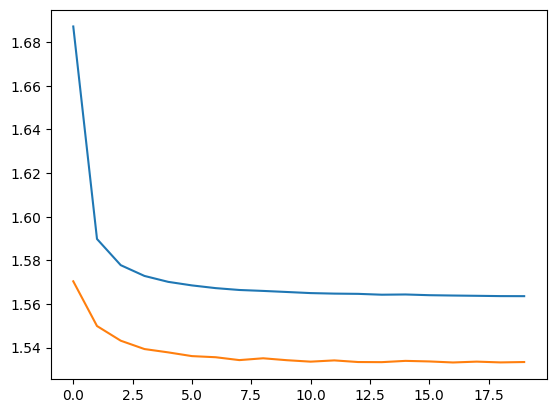

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

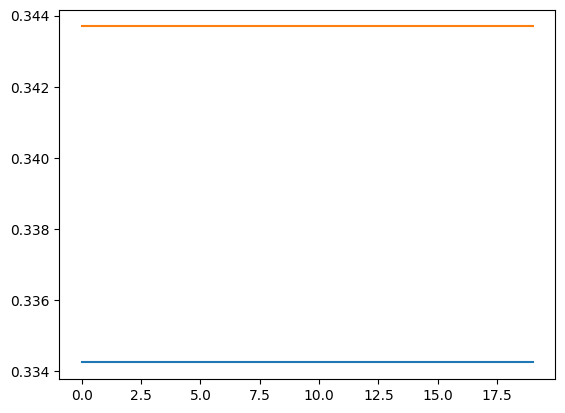

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#Not necessary
#Now, we create the intervals, and the necessary data.

#Now we need to get the number of devices in each interval
#We create the necessary variables
numberOfDevicesInTimeset=0
intervals = pd.DataFrame({"Timsets":[],
                            "Values":[],
                          "Occupancy":[]})


currentInterval=df["interval"][0]


maclist=[]

for index in range(len(df)):
    if df.iloc[index]["interval"]==currentInterval:
        if len(maclist)==0:
            maclist.append(df.iloc[index]["src"])
            numberOfDevicesInTimeset+=1
        else:
            boolProb=False
            for i in range(len(maclist)):
                if maclist[i]==df.iloc[i]["src"]:
                    boolProb=True
                    break
            if boolProb==False:
                maclist.append(df.iloc[index]["src"])
                numberOfDevicesInTimeset+=1

    else:
        maclist=[]
        intervals.loc[len(intervals.index)]=[currentInterval, numberOfDevicesInTimeset,df.iloc[index]["occupancy"]]
        numberOfDevicesInTimeset=0
        currentInterval=df.iloc[index]["interval"]

In [ ]:
#pyplot

intervals.plot(x='Timsets', y='Occupancy', kind='line')
intervals.plot(y='Values', kind='line')

plt.title('Probe Counts Over Time')

plt.xlabel('Interval')

plt.ylabel('Probe Counts')

plt.grid(True)

plt.show()
